In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

*Setting pd.options.display.max_rows to 20 means that when you display a pandas DataFrame in your code, it will show at most 20 rows. This can be helpful when dealing with large datasets to avoid cluttering your display with too much information at once.*..

In [39]:
pd.options.display.max_rows = 20

*loading a JSON file named 'allyears.json' into a pandas DataFrame named allyears. Loading JSON files into pandas DataFrames is a common way to work with structured data in Python.**

In [40]:
allyears = pd.read_json('allyears.json')

In [41]:
allyears

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018


*Setting the index of the DataFrame allyears to be a multi-level index consisting of the columns 'sex', 'name', and 'year'. Then, you're sorting the DataFrame based on this multi-level index.*

*Setting a multi-level index can be useful for organizing and accessing data hierarchically. Sorting the index ensures that the data is ordered based on the levels of the index, which can be beneficial for certain operations and analyses*

In [42]:
allyears_indexed = allyears.set_index(['sex', 'name', 'year']).sort_index()

In [43]:
allyears_indexed

number
sex name   year        
F   Aabha  2011       7
           2012       5
           2014       9
           2015       7
           2016       7
...                 ...
M   Zyvion 2009       5
    Zyvon  2015       7
    Zyyon  2014       6
    Zzyzx  2010       5
           2018       5

[1957046 rows x 1 columns]

*Use the .loc[] indexer with a multi-level index to select rows from the DataFrame allyears_indexed. Specifically, you're trying to select rows where the 'sex' is 'F', the 'name' is 'Mary', and the 'year' is 2011.*

*This will return the row(s) that match the specified index values. If there are multiple rows that match the criteria, they will all be returned.*

In [44]:
allyears_indexed.loc[('F', 'Mary', 2011)]

number    2706
Name: (F, Mary, 2011), dtype: int64

*Plot data from the DataFrame allyears_indexed for the specific combination of 'sex' being 'F' and 'name' being 'Mary'. However, the .plot() function expects data in the form of x and y values to create a plot.*

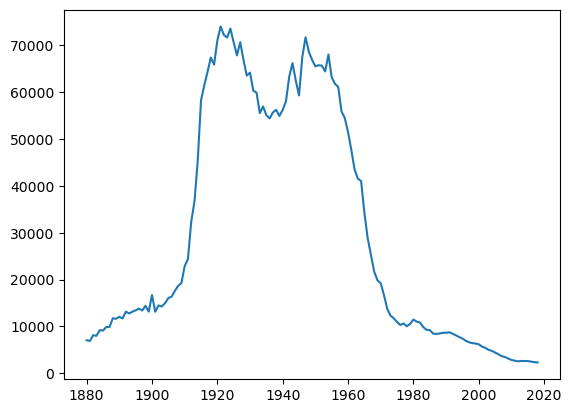

In [45]:
plt.plot(allyears_indexed.loc[('F', 'Mary')])

*Plot the ratio of occurrences of the name 'Mary' for females over the years, normalized by the total number of occurrences in each year. However, the division operation you're trying to perform may not work as expected because the shapes of the two Series objects may not match.*

*This code will plot the ratio of occurrences of the name 'Mary' for females over the total occurrences in each year. Each point on the plot represents the proportion of occurrences of 'Mary' compared to the total occurrences for females in that year.*

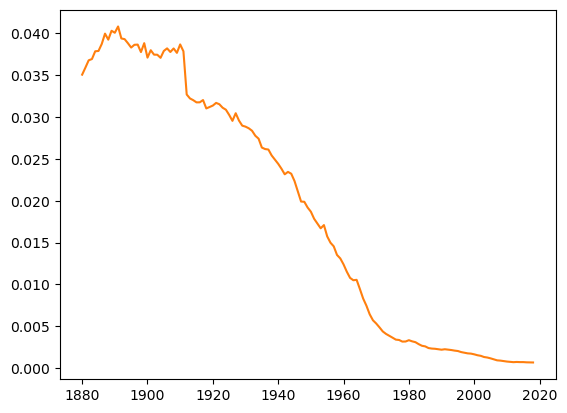

In [46]:
plt.plot(allyears_indexed.loc[('F', 'Mary')] / allyears.groupby('year').sum())

*The 'plotname' function seems to be designed to plot the occurrences of a given name over the years for a specific sex. It retrieves the data for the specified name and sex from the indexed DataFrame allyears_indexed, then plots the occurrences over the years using matplotlib.*

In [77]:
def plotname(sex, name):
    data =  allyears_indexed.loc[(sex, name)]

    plt.plot(data.index.get_level_values('year'), data['number'], label=name)
    plt.xlabel('Year')
    plt.ylabel('Number of occurrences')
    plt.title(f'Occurrences of {sex} names over the years')
    plt.legend()
    plt.axis(xmin=1880, xmax=2018)
    

*Designed to compare the occurrences of multiple names over the years for a specific sex. It iterates over the list of names provided as input and calls the plotname function for each name, generating a separate plot for each name. After plotting all the names, it attempts to add a legend to the plot.*

*The legend will include labels for each name passed to the function.*

In [78]:
def comparenames(sex, names):
    plt.figure(figsize=(12, 2.5))

    for name in names:
        plotname(sex, name)

    plt.legend(names)
    plt.show()

*Modified the list of names to include 'Michael', 'John', 'David', and 'Joe'.*

*This will generate a figure with four subplots, each showing the occurrences of one of the specified names ('Michael', 'John', 'David', and 'Joe') over the years for males. The legend will indicate which line corresponds to each name.*

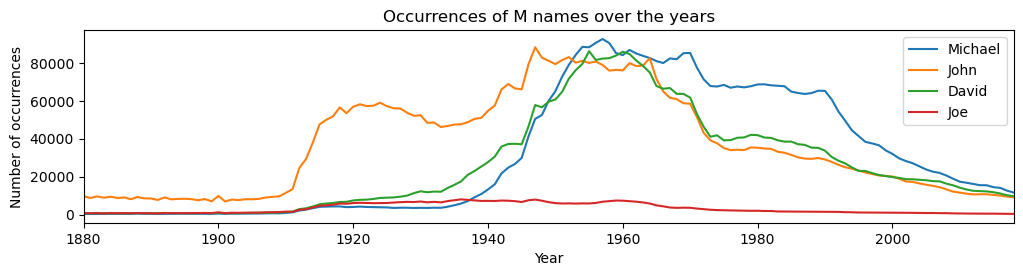

In [79]:
comparenames('M', ['Michael', 'John', 'David', 'Joe'])

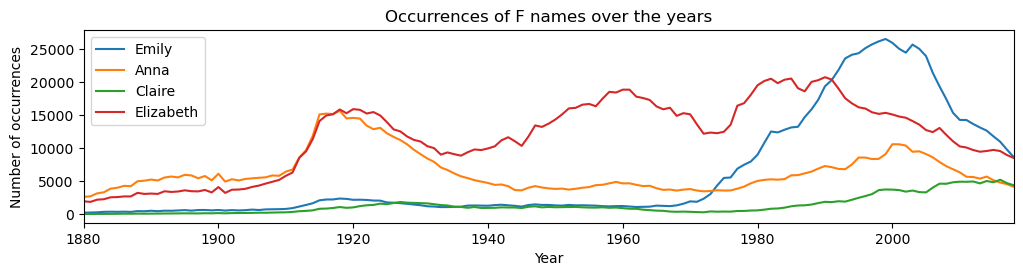

In [80]:
comparenames('F', ['Emily', 'Anna', 'Claire', 'Elizabeth'])

*ompare the occurrences of the names 'Emily', 'Anna', 'Claire', and 'Elizabeth' for females over the years using the comparenames function*

*This will generate a figure with four subplots, each showing the occurrences of one of the specified names over the years for females. The legend will indicate which line corresponds to each name.*

In [84]:
claires = ['Claire', 'Clare', 'Clara', 'Chiara', 'Ciara']

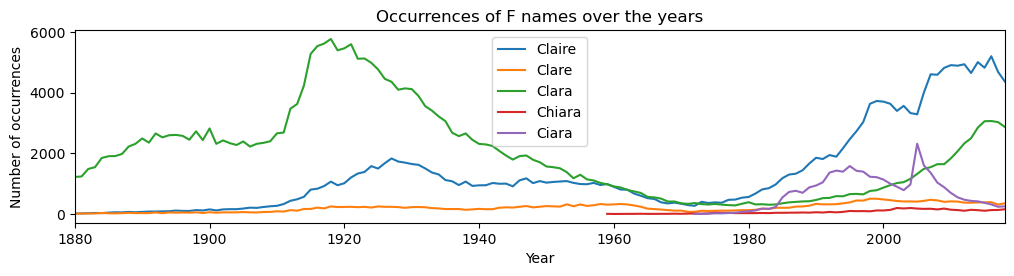

In [83]:
comparenames('F', claires)

*Access data for all years for the name "Claire" for females from the DataFrame allyears_indexed.*

*This will retrieve all the data for the name "Claire" for females across all years.*

In [85]:
allyears_indexed.loc[('F', claires), :]

number
sex name   year        
F   Claire 1880      21
           1881      23
           1882      30
           1883      38
           1884      33
...                 ...
    Ciara  2014     422
           2015     372
           2016     321
           2017     243
           2018     256

[522 rows x 1 columns]

*Use the unstack method to pivot the data for the name "Claire" for females across all years into a more readable format. However, the variable claires is not defined in this context.*

*This will pivot the data for the name "Claire" for females across all years into a DataFrame where the columns represent the years and the index represents the sex and name.*

In [57]:
allyears_indexed.loc[('F', claires), :].unstack(level=2)

number                                                          \
year          1880    1881    1882    1883    1884    1885    1886    1887   
sex name                                                                     
F   Claire    21.0    23.0    30.0    38.0    33.0    49.0    61.0    58.0   
    Clare     15.0    20.0    21.0    22.0    38.0    27.0    26.0    31.0   
    Clara   1226.0  1242.0  1490.0  1548.0  1852.0  1910.0  1916.0  1984.0   
    Chiara     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
    Ciara      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

                            ...                                          \
year          1888    1889  ...    2009    2010    2011    2012    2013   
sex name                    ...                                           
F   Claire    73.0    62.0  ...  4824.0  4915.0  4896.0  4944.0  4656.0   
    Clare     43.0    34.0  ...   405.0   421.0   414.0   379.0   377.0   
    Clara   2230.0  2319.0  ...  1647.0  1840.0  2074.0  2333.0  2504.0   
    Chiara     NaN     NaN  ...   183.0   145.0   134.0   111.0   142.0   
    Ciara      NaN     NaN  ...   888.0   699.0   554.0   475.0   436.0   

                                                    
year          2014    2015    2016    2017    2018  
sex name                                            
F   Claire  5014.0  4829.0  5209.0  4693.0  4379.0  
    Clare    386.0   389.0   394.0   315.0   357.0  
    Clara   2854.0  3064.0  3072.0  3035.0  2877.0  
    Chiara   131.0   111.0   134.0   137.0   160.0  
    Ciara    422.0   372.0   321.0   243.0   256.0  

[5 rows x 139 columns]

In [58]:
allyears_indexed.loc[('F', claires), :].unstack(level=1)

number                             
name      Claire  Clare   Clara Chiara  Ciara
sex year                                     
F   1880    21.0   15.0  1226.0    NaN    NaN
    1881    23.0   20.0  1242.0    NaN    NaN
    1882    30.0   21.0  1490.0    NaN    NaN
    1883    38.0   22.0  1548.0    NaN    NaN
    1884    33.0   38.0  1852.0    NaN    NaN
...          ...    ...     ...    ...    ...
    2014  5014.0  386.0  2854.0  131.0  422.0
    2015  4829.0  389.0  3064.0  111.0  372.0
    2016  5209.0  394.0  3072.0  134.0  321.0
    2017  4693.0  315.0  3035.0  137.0  243.0
    2018  4379.0  357.0  2877.0  160.0  256.0

[139 rows x 5 columns]

*reate a stack plot to visualize the occurrences of multiple names for females over the years.*

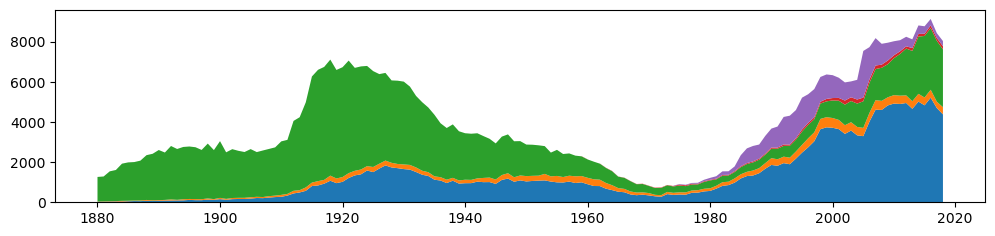

In [59]:
plt.figure(figsize=(12,2.5))
plt.stackplot(range(1880, 2019),
             allyears_indexed.loc[('F', claires), :].unstack(level=2))

*Creates a stacked plot for the occurrences of multiple names for females over the years.*

- plt.figure(figsize=(12, 2.5)): Sets the figure size to be 12 inches wide and 2.5 inches tall.
- plt.stackplot(range(1880, 2019), allyears_indexed.loc[('F', claires), :].unstack(level=2).fillna(0), labels=claires): Creates the stacked plot, with each name in claires being stacked on top of each other. The .fillna(0) method fills any missing values with 0.
- plt.legend(loc='upper left'): Adds a legend to the plot, positioned in the upper left corner.
- plt.xlabel('Year'): Sets the label for the x-axis.
- plt.ylabel('Number of occurrences'): Sets the label for the y-axis.
- plt.title('Stacked plot of occurrences for selected names (Female)'): Sets the title of the plot.
- plt.axis(xmin=1880, xmax=2018): Sets the limits of the x-axis to range from 1880 to 2018.

*This code will generate a stacked plot where each name will have its own colored area, representing its occurrences over the years. The legend will indicate which color corresponds to each name.* 2018.

(1880.0, 2018.0, 0.0, 9586.5)

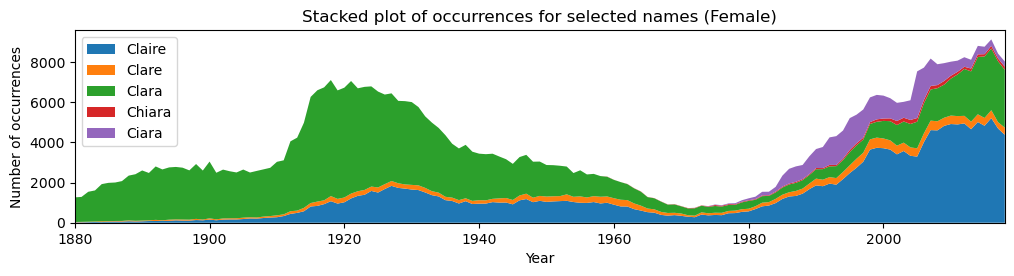

In [86]:
plt.figure(figsize=(12, 2.5))
plt.stackplot(range(1880, 2019),
              allyears_indexed.loc[('F', claires), :].unstack(level=2).fillna(0),
              labels=claires)

plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('Number of occurrences')
plt.title('Stacked plot of occurrences for selected names (Female)')
plt.axis(xmin=1880, xmax=2018)